# Plot One State or Region
This Jupyter notebook shows how to get data from the https://covidtracking.com website
and use it to create interesting visualizations. We focus here on plotting data about one
state or region of the US.

First we import the covid19 module which defines several useful functions including
``` python
collectData(list_of_states,field) --  
    return a list of (data,val) pairs for the specified field and region

plotItems( date_val_pairs, label) -- 
    plot the specified dataset with the specified label

states 
    = list of all US states

northEast, midAtlantic,southEast, southWest, midWest, west, northWest
    = lists of states in each region

```

In [1]:
from covid19 import *

done


## Plotting multiple fields for a given state or region
Here we show how to plot three fields for a specified region and we plot deaths by 100K not 10K

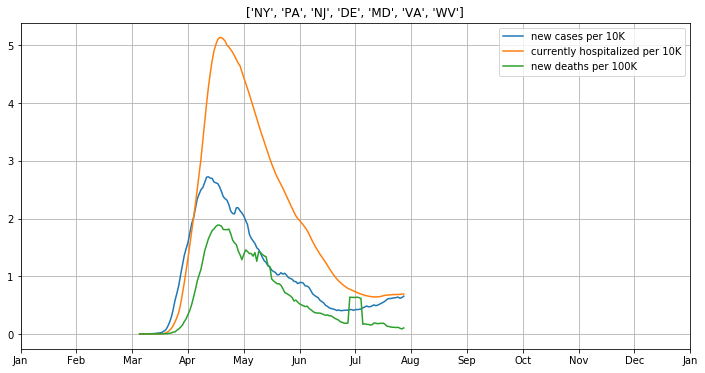

In [2]:
s = midAtlantic #['MA'] # list of states to be analyzed... states is all US states and territories



plt.rcParams['figure.figsize'] = [12, 6]  # set the size of the plot

# plot three fields and specify their labels for the legend
plotItems(collectData(s,'positiveIncrease'),'new cases per 10K')
plotItems(collectData(s,'hospitalizedCurrently'),'currently hospitalized per 10K')
plotItems([(d[0],d[1]*10) for d in collectData(s,'deathIncrease')],'new deaths per 100K')

# print the title, legend, and add a grid
plt.title(s if len(s)<10 else str(list(s)[:10])+" and more")
plt.legend()
plt.grid()


## The collectData function
The collectData function takes two parameters ... a list of states, and a field name.
It also has an optional parameters options with two field:
* perCapita (defaults to True) and 
* averageByWeek (defaults to True)

It returns a list of tuples where the first is the day of the year (1/1/2020 = 1 and 12/31/2020 = 366)
and the second is the value of that field for that day (possibly divided by the state population and/or averaged over the past week).

Here is an example of using it to find the number of new cases per day in the last 10 days in MA.

In [77]:
data = collectData(['MA'],'positiveIncrease',options={'perCapita':False,'averageByWeek':False})
data[-10:]

[(197, 217),
 (198, 234),
 (199, 298),
 (200, 359),
 (201, 296),
 (202, 255),
 (203, 244),
 (204, 287),
 (205, 0),
 (206, 327)]

# Plotting one covid stat for one state over time
we can plot that data as follows:

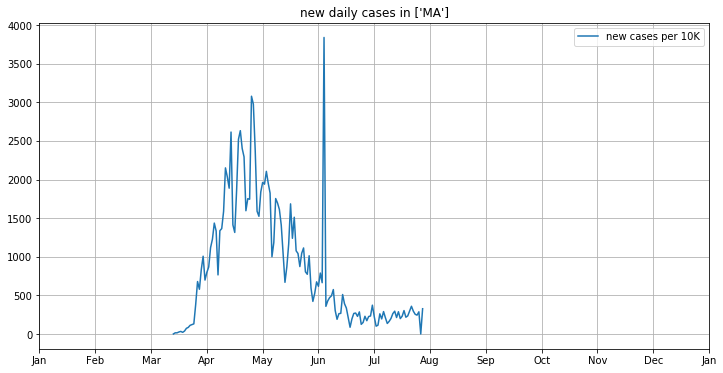

In [78]:
s = ['MA'] 
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [12, 6]
plotItems(
    collectData(s,'positiveIncrease',
                options={'perCapita':False,'averageByWeek':False}),
    'new cases per 10K')
plt.title("new daily cases in "+str(s))
plt.legend()
ax.grid()

## Fields available for the US states covid data
Here is a list of all of the keys available, and you can learn more at the https://covidtracking.com site where we get the data.

In [5]:
list(cdata[0][0].keys())

['date',
 'state',
 'positive',
 'negative',
 'pending',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'recovered',
 'dataQualityGrade',
 'lastUpdateEt',
 'dateModified',
 'checkTimeEt',
 'death',
 'hospitalized',
 'dateChecked',
 'totalTestsViral',
 'positiveTestsViral',
 'negativeTestsViral',
 'positiveCasesViral',
 'deathConfirmed',
 'deathProbable',
 'fips',
 'positiveIncrease',
 'negativeIncrease',
 'total',
 'totalTestResults',
 'totalTestResultsIncrease',
 'posNeg',
 'deathIncrease',
 'hospitalizedIncrease',
 'hash',
 'commercialScore',
 'negativeRegularScore',
 'negativeScore',
 'positiveScore',
 'score',
 'grade']

## Details on structure of the covid datasets
Here we look more closely at the list returned by get_covid_data it consists of an array data where
``` python
data[0] holds the data for all states
data[1] holds the data for the US
```
data[0] is an object whose keys are the names of the US 

In [93]:
data = get_covid_data()
statedatum = data[0][0]
usdataum = data[1][0]
print("length data:"+str(len(data)))
print("length data[0]:"+str(len(data[0])))
print("length data[0][0]:"+str(len(data[0][0])))
print("length data[1]:"+str(len(data[1])))
print("\nstate data keys")
print(list(statedatum))
print("\nus keys")
print(list(data[1][0]))
print("\nfirst states/dates in data[0]")
print([(d['date'],d['state']) for d in data[0][:10]])


length data:2
length data[0]:7969
length data[0][0]:41
length data[1]:186

state data keys
['date', 'state', 'positive', 'negative', 'pending', 'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt', 'death', 'hospitalized', 'dateChecked', 'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'fips', 'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults', 'totalTestResultsIncrease', 'posNeg', 'deathIncrease', 'hospitalizedIncrease', 'hash', 'commercialScore', 'negativeRegularScore', 'negativeScore', 'positiveScore', 'score', 'grade']

us keys
['date', 'states', 'positive', 'negative', 'pending', 'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered', 'da

## Comparing Democratic and Republican states on covid stats
Here we show how to compare democratic and republican states (based on who they voted for in 2016) on any field.

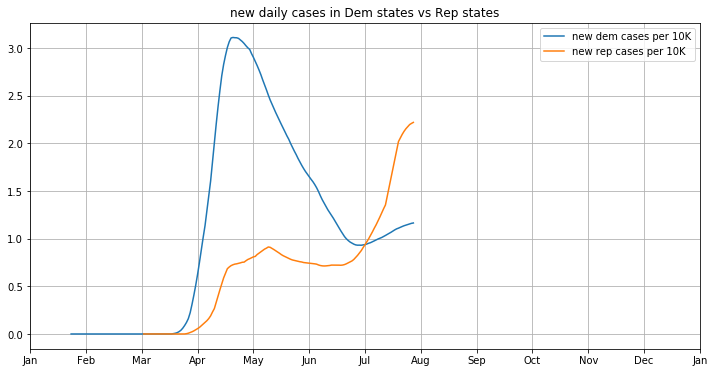

In [7]:
 
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [12, 6]
field='hospitalizedCurrently'
plotItems(
    collectData(demStates,field,
                options={'perCapita':True,'averageByWeek':True}),
    'new dem cases per 10K')
plotItems(
    collectData(repStates,field,
                options={'perCapita':True,'averageByWeek':True}),
    'new rep cases per 10K')
plt.title("new daily cases in Dem states vs Rep states")
plt.legend()
ax.grid()

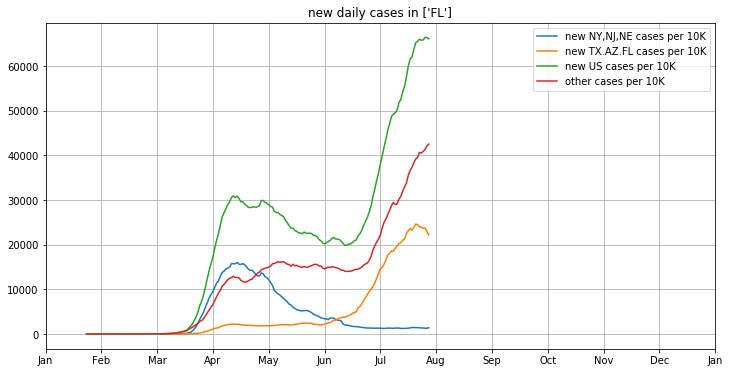

In [8]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [12, 6]
plotItems(
    collectData(['NY','NJ','CT','RI','MA'],'positiveIncrease',
                options={'perCapita':False,'averageByWeek':True}),
    'new NY,NJ,NE cases per 10K')
plotItems(
    collectData(['TX','FL','AZ'],'positiveIncrease',
                options={'perCapita':False,'averageByWeek':True}),
    'new TX.AZ.FL cases per 10K')
plotItems(
    collectData(states,'positiveIncrease',
                options={'perCapita':False,'averageByWeek':True}),
    'new US cases per 10K')
plotItems(
    collectData(otherStates(['NY','NJ','CT','RI','MA','TX','FL','AZ']),'positiveIncrease',
                options={'perCapita':False,'averageByWeek':True}),
    'other cases per 10K')
plt.title("new daily cases in "+str(s))
plt.legend()
ax.grid()

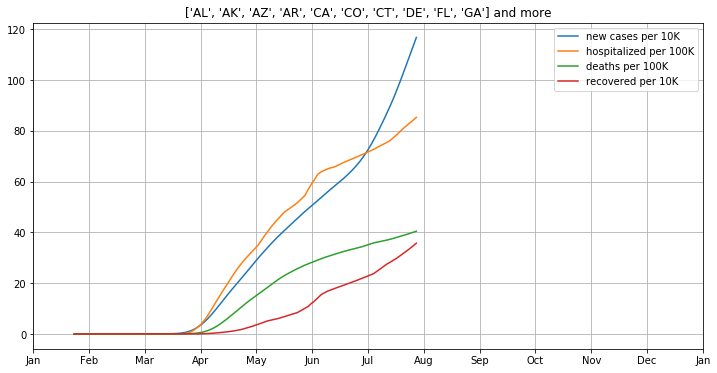

In [38]:
s = states #['MA'] #['MA'] # list of states to be analyzed... states is all US states and territories

plt.rcParams['figure.figsize'] = [12, 6]  # set the size of the plot

# plot three fields and specify their labels for the legend
plotItems(collectData(s,'positive'),'new cases per 10K')
plotItems([(d[0],d[1]*10) for d in collectData(s,'hospitalizedCumulative')],'hospitalized per 100K')
plotItems([(d[0],d[1]*10) for d in collectData(s,'death')],'deaths per 100K')
plotItems([(d[0],d[1]*1) for d in collectData(s,'recovered')],'recovered per 10K')

# print the title, legend, and add a grid
plt.title(s if len(s)<10 else str(list(s)[:10])+" and more")
plt.legend()
plt.grid()

## Plotting Quotients of data fields and changes over a given time period
Here we give an example of plotting an estimate of the Case Fatality Rate for a region
as well as looking for how it is changing (its slope, or more accurately secant)

In this example we divide the current deaths by the number of cases dt days ago,
with the assumption that it takes a few days to go from diagnosis to death

The slope function calculates the differences between the values now and the values dt days ago

In [10]:
def slope(dt,data):
    """ slope(data,dt) returns a list of the daily increase averaged over dt days
        setting dt=0 returns the original data
    """
    if dt==0:
        return data
    slopedata = []
    for i in range(len(data)):
        cur = data[i]
        prev = data[i-dt if i>=dt else 0]
        y1 = cur[1]
        y0 = prev[1]
        slopedata += [(cur[0],(y1-y0)/dt)]
    return slopedata

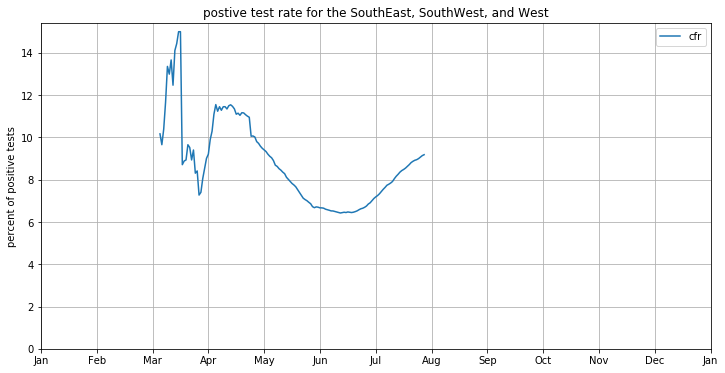

In [97]:
s = southEast+southWest+west #['MA'] 
dt=0


fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [12, 6]
options ={'perCapita':False,'averageByWeek':False} 
cases = collectData(s,'total', options)
deaths = collectData(s,'positive', options)
cfr = [(deaths[i][0],min(15,max(0,deaths[i][1])/(cases[i-dt][1] if i>=dt and cases[i-dt][1]>0 else 10000000)*100)) for i in range(len(cases))]
plotItems( slope(0,cfr), 'cfr')
#plt.title("Case Fatality Rate "+str(s))
plt.title("postive test rate for the SouthEast, SouthWest, and West")
plt.legend()
plt.ylabel("percent of positive tests")
plt.yticks(np.arange(0,16,step=2))  // this sets the ticks on the yaxis
ax.grid()
fig.savefig("PostiveTestRate-SE+SW+W")